<a href="https://colab.research.google.com/github/manujsinghwal/applied-statistics-in-python/blob/main/2.%20data-vizualization/the_histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogram

A **histogram** is a type of bar chart that shows the distribution of numerical data. It represents data by grouping numbers into ranges (called **bins** or **classes**) and showing how many data points fall into each range.
* Each bar in a histogram represents a range (or class).
* The height of each bar shows how many data points (or occurrences) fall within that range.

\
**Note:** We should only plot histograms for quantitative data (numerical data).

\
**How to decide classes or bins?**
\
**E.g.** Refer to the dataset below, the numbers of calls per day made from a cell phone for the past 30 days.
\
$[4, 5, 1, 0, 7, 8, 3, 6, 8, 3, 0, 9, 2, 12, 14, 5, 5, 10, 7, 2, 11, 9, 4, 3, 1, 5, 7, 3, 5, 6]$

\
One option is the $ 2^k >= n $ rule to determine the number of classes, where $k$ equals the number of classes and $n$ equals the number of data points.
\
\
Given $n = 30$, the best value for $k$ is 5. How?
\
$ 2^k >= n $
\
$ 2^k >= 30 $
\
$ 2^5 >= 30 $
\
$ 32 >= 30 $
\
\
Calculate the width $W$ of each class.
\
\
$ W = \frac{Largest\:value - Smallest\:value}{Number\:of\:classes}\ $
\
$ W = \frac{14 - 0}{5}\ $
\
$ W = 2.8 ≈	3 $

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Generating dataset
df = pd.DataFrame({
    'Date':['2021-03-01','2021-03-02','2021-03-03','2021-03-04','2021-03-05','2021-03-06','2021-03-07','2021-03-08','2021-03-09','2021-03-10','2021-03-11','2021-03-12','2021-03-13','2021-03-14','2021-03-15','2021-03-16','2021-03-17','2021-03-18','2021-03-19','2021-03-20','2021-03-21','2021-03-22','2021-03-23','2021-03-24','2021-03-25','2021-03-26','2021-03-27','2021-03-28','2021-03-29','2021-03-30'],
    'Class': ['[3-6)','[3-6)','[0-3)','[0-3)','[6-9)','[6-9)','[3-6)','[6-9)','[6-9)','[3-6)','[0-3)','[9-12)','[0-3)','[12-15)','[12-15)','[3-6)','[3-6)','[9-12)','[6-9)','[0-3)','[9-12)','[9-12)','[3-6)','[3-6)','[0-3)','[3-6)','[6-9)','[3-6)','[3-6)','[6-9)'],
    'CallsPerDay': [4,5,1,0,7,8,3,6,8,3,0,9,2,12,14,5,5,10,7,2,11,9,4,3,1,5,7,3,5,6],
    'DayType': ['Weekday','Weekday','Weekday','Weekday','Weekday','Weekend','Weekend','Weekday','Weekday','Weekday','Weekday','Weekday','Weekend','Weekend','Weekday','Weekday','Weekday','Weekday','Weekday','Weekend','Weekend','Weekday','Weekday','Weekday','Weekday','Weekday','Weekend','Weekend','Weekday','Weekday']
})

# Getting weekdays for above dates
df['Date'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['Date'].dt.strftime('%a')

# Shows top 5 records only
df.head()

,Date,Class,CallsPerDay,DayType,Weekday
0,2021-03-01,[3-6),4,Weekday,Mon
1,2021-03-02,[3-6),5,Weekday,Tue
2,2021-03-03,[0-3),1,Weekday,Wed
3,2021-03-04,[0-3),0,Weekday,Thu
4,2021-03-05,[6-9),7,Weekday,Fri


In [ ]:
# Best number of classes based on the rule 2^k >= n (since 2^5 >= 30)
k = 5
min_value = df['CallsPerDay'].min()
max_value = df['CallsPerDay'].max()

# Classes width (rounded up to the next whole number)
w = np.ceil((max_value - min_value)/k).astype(int)
w

3

In [ ]:
# Creating bins
bins = np.arange(min_value, max_value + w, w)
bins

array([ 0,  3,  6,  9, 12, 15])

In [ ]:
# Setting up some customizations
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='white') # Setting the background theme

<Figure size 1000x600 with 0 Axes>

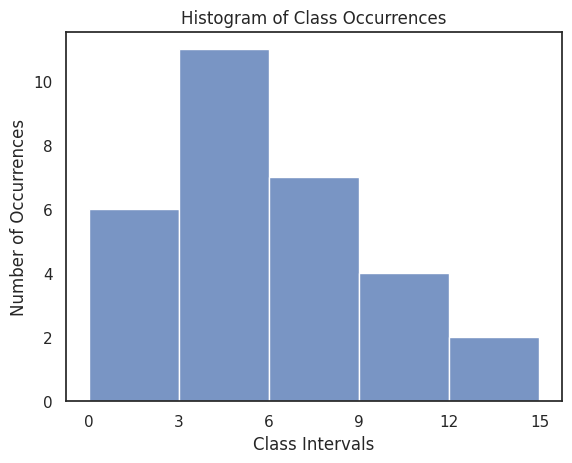

In [ ]:
# Plotting histogram
sns.histplot(
    data=df,
    x='CallsPerDay',
    bins=bins
    )

# Setting up x-axis ticks to match the bin edges
plt.xticks(bins)

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

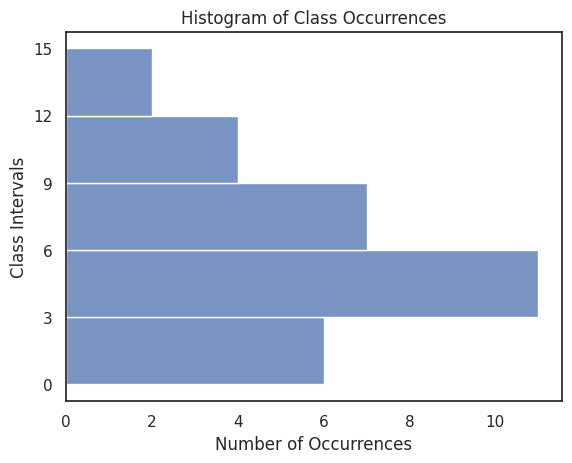

In [ ]:
# Plotting histogram
# Flipping the plot by assigning the data variable to the y axis
sns.histplot(
    data=df,
    y='CallsPerDay',
    bins=bins
    )

# Setting up y-axis ticks to match the bin edges
plt.yticks(bins)

# Adding labels and title
plt.ylabel("Class Intervals")
plt.xlabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

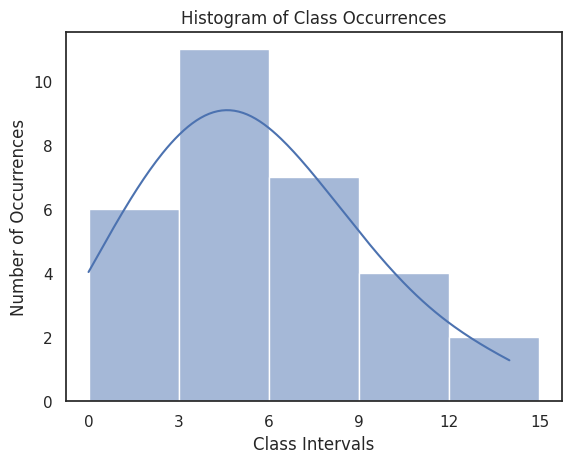

In [ ]:
# Plotting histogram
# Adding a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution
sns.histplot(
    data=df,
    x='CallsPerDay',
    bins=bins,
    kde=True
    )

# Setting up x-axis ticks to match the bin edges
plt.xticks(bins)

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

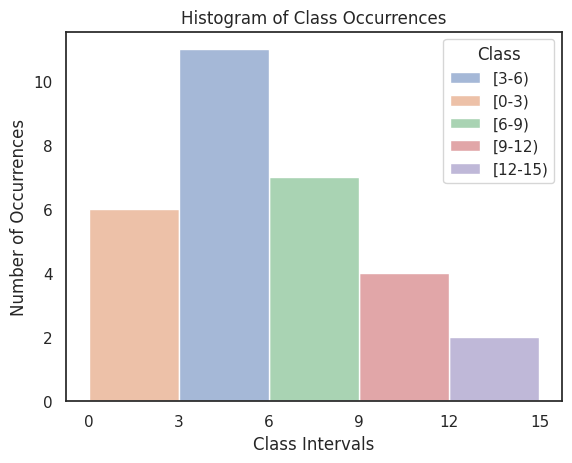

In [ ]:
# Plotting histogram with hue mapping
sns.histplot(
    data=df,
    x='CallsPerDay',
    bins=bins,
    hue='Class'
    )

# Setting up x-axis ticks to match the bin edges
plt.xticks(bins)

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

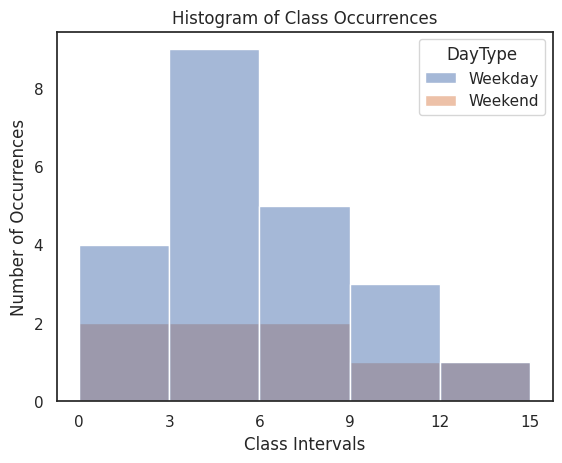

In [ ]:
# Plotting histogram with hue mapping
# Multiple histogram based on the type of data, basically a good approach when we have to compare multiple distributions in the same histogram
sns.histplot(
    data=df,
    x='CallsPerDay',
    bins=bins,
    hue='DayType'
    )

# Setting up x-axis ticks to match the bin edges
plt.xticks(bins)

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

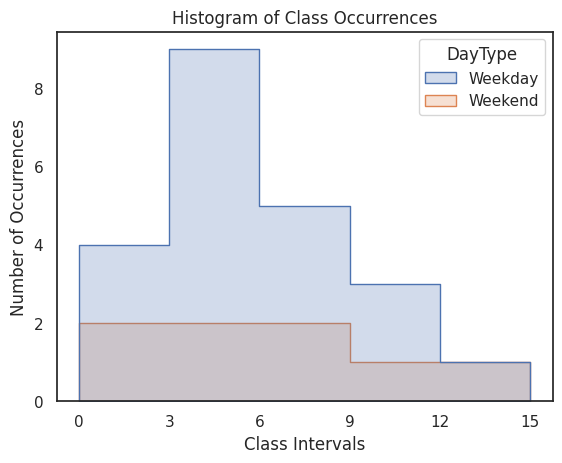

In [ ]:
# Plotting histogram with hue mapping
# Sometimes overlapping bars can be hard to visually resolve. A different approach would be to draw a 'step' function
sns.histplot(
    data=df,
    x='CallsPerDay',
    bins=bins,
    hue='DayType',
    element='step'
    )

# Setting up x-axis ticks to match the bin edges
plt.xticks(bins)

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

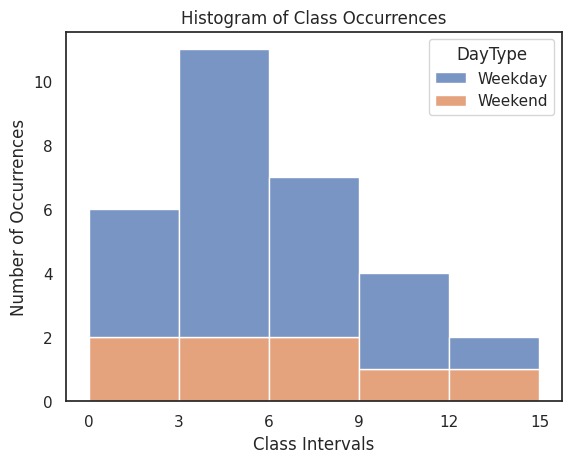

In [ ]:
# Plotting histogram with hue mapping
# The default approach to plotting multiple distributions is to 'layer' them (as shown in above histogram), but we can also 'stack' them
sns.histplot(
    data=df,
    x='CallsPerDay',
    bins=bins,
    hue='DayType',
    multiple='stack'
    )

# Setting up x-axis ticks to match the bin edges
plt.xticks(bins)

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

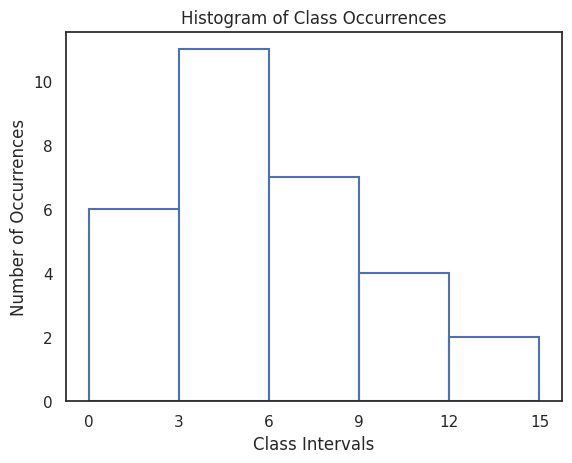

In [ ]:
# Plotting histogram but with no fill
sns.histplot(
    data=df,
    x='CallsPerDay',
    bins=bins,
    fill=False
    )

# Setting up x-axis ticks to match the bin edges
plt.xticks(bins)

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

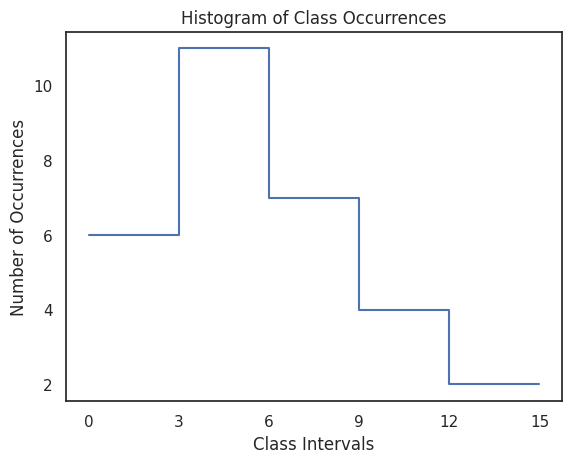

In [ ]:
# Plotting histogram with 'step' but no fill
sns.histplot(
    data=df,
    x='CallsPerDay',
    bins=bins,
    element='step',
    fill=False
    )

# Setting up x-axis ticks to match the bin edges
plt.xticks(bins)

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

**Discrete Values:**
\
Discrete data consists of distinct, separate values. These values are countable and cannot be meaningfully divided into smaller parts (e.g., integers).

\
**Continuous Values:**
\
Continuous data can take any value within a range and can be divided into infinitely smaller parts (e.g., decimals or real numbers).

\
**Note:** ```discrete=False``` is by default in seaborn ```histplot()``` function.

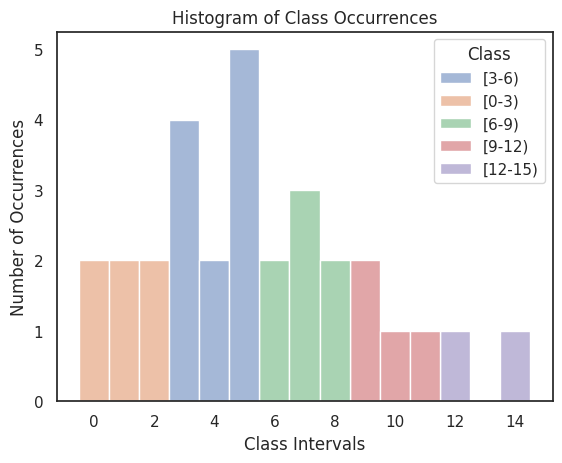

In [ ]:
# Plotting histogram with hue mapping
# Plotting for discrete values
sns.histplot(
    data=df,
    x='CallsPerDay',
    hue='Class',
    discrete=True
    )

# Adding labels and title
plt.xlabel("Class Intervals")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Class Occurrences")
plt.show()

#### **When to avoid histograms?**
* **Small datasets:** Insufficient data leads to unreliable insights.
* **Categorical data:** Use bar plots instead.


#### **Common Mistakes:**
* **Wrong bin sizes:** Too few or too many bins mislead interpretation.
* **Ignoring skewness:** Apply log transformations for skewed data.
* **Overlapping histograms:** Use transparency or side-by-side plots.
* **Overreliance on KDE:** KDE(Kernel Density Estimation) is for smoothing, not exact frequencies.
* **Outliers affecting axis:** Set axis limits for better visualization.

#### **Histogram With Skewed Data:**
Using a log scale when plotting histograms is especially helpful for dealing with skewed data. Skewed data means that most of the data points are concentrated on one side of the distribution, while a few points are much larger or smaller than the rest. This can make it hard to visualize the full range of the data on a regular scale because the large values dominate the plot.


#### **Why use a log scale?**
* **Handling Extreme Values:**
In a skewed dataset, some values might be very large compared to others. If you use a regular scale, those large values can distort the histogram, making it hard to see the smaller values. A log scale compresses the large values, making them easier to compare with smaller values.

* **Improved Visualization:**
A log scale spreads out the values more evenly when the data spans several orders of magnitude. This makes the histogram easier to interpret, especially when we're looking at data that has both small and large numbers.

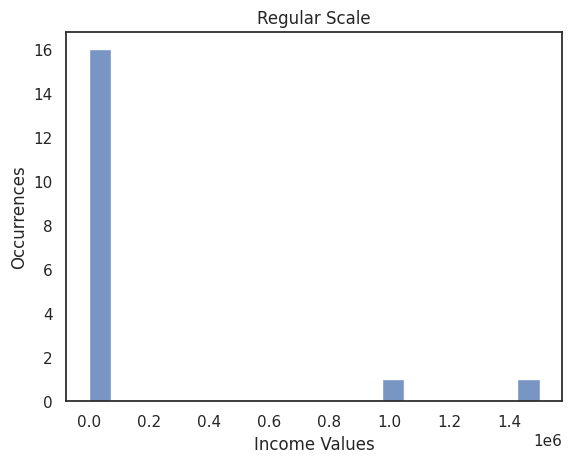

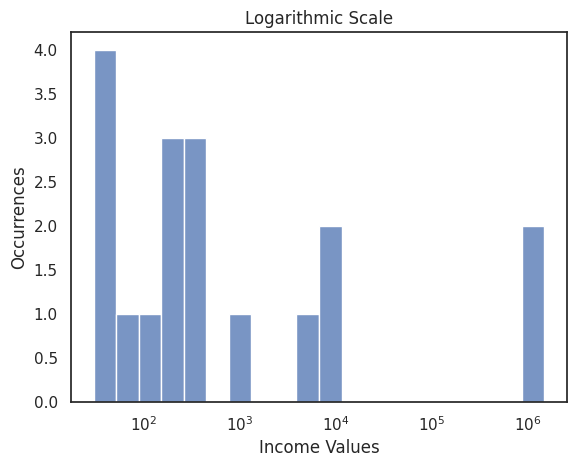

In [ ]:
# Example of skewed data
df1 = [30, 35, 50, 45, 60, 100, 200, 230, 245, 300, 320, 420, 1000, 5000, 8000, 10000, 1000000, 1500000]

# Plotting histogram
sns.histplot(
    data=df1,
    bins=20
    )

# Adding labels and title
plt.xlabel("Income Values")
plt.ylabel("Occurrences")
plt.title("Regular Scale")
plt.show()


# Plotting histogram with log scale
sns.histplot(
    data=df1,
    bins=20,
    log_scale=True
    )

# Adding labels and title
plt.xlabel("Income Values")
plt.ylabel("Occurrences")
plt.title("Logarithmic Scale")
plt.show()